In [1]:
import pandas as pd

In [2]:
%matplotlib inline

In [3]:
import glob
fns = glob.glob('/data/odc/derivatives/encoding_model/sub-*/ses-*/func/sub-*_desc-V1**.pkl.gz')
df = []

for fn in fns:
    df.append(pd.read_pickle(fn))
    
df = pd.concat(df)

import numpy as np

df.loc[(df['eye'] == 'left') & (df['bayes factor'] > 1), 'correct'] = 1
df.loc[(df['eye'] == 'left') & (df['bayes factor'] < 1), 'correct'] = 0

df.loc[(df['eye'] == 'right') & (df['bayes factor'] > 1), 'correct'] = 0
df.loc[(df['eye'] == 'right') & (df['bayes factor'] < 1), 'correct'] = 1

df['correct'] = df['correct'].astype(float)

df['log(bayes factor)'] = np.log10(df['bayes factor'])
df['q(log(bayes_factor))'] = pd.qcut(df['bayes factor'], 10)

import seaborn as sns

# fac = sns.FacetGrid(df.reset_index().groupby(['subject', 'session', 'n_vertices', 'task', 'roi', 'lambda'], as_index=False).mean(), row='roi', 
#                    aspect=1.5, hue='lambda', col='subject')
# fac.map(sns.lineplot, 'n_vertices', 'correct')
# fac.add_legend()
# fac.set(xscale="log")

/Users/gdehol/miniconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:2819: PerformanceWarning: indexing past lexsort depth may impact performance.
  raw_cell, store_history, silent, shell_futures)


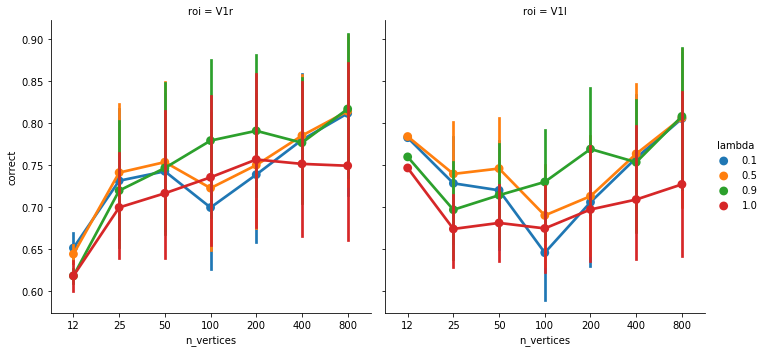

In [4]:
tmp = df[np.in1d(df.roi, ['V1l', 'V1r']) & (df.depth == 'all')]
tmp = tmp[~(tmp.subject == 'ns') & ~((tmp.subject == 'bm') & ((tmp.roi == 'V1l')))]

tmp = tmp.reset_index().groupby(['subject', 'session', 'roi', 'n_vertices', 'lambda'], as_index=False).mean()
tmp['subject_'] = tmp.apply(lambda row: '{subject}.{session}'.format(**row.to_dict()), axis=1)


sns.catplot('n_vertices', 'correct', 'lambda', data=tmp, col='roi', units='subject', kind='point')

In [5]:
tmp = df[np.in1d(df['roi'], ['V1l', 'V1r']) & (df.n_vertices == 400) & (df['lambda'] == 0.9)]
tmp = tmp[~(tmp.subject == 'ns') & ~((tmp.subject == 'bm') & (tmp.roi == 'V1l'))].reset_index()

In [6]:
depths = tmp.depth.unique().tolist()
tmp['Layer'] = tmp.depth.apply(lambda x: 6 - depths.index(x) if x != 'all' else 'all')

In [7]:
tmp['Correct']  = tmp['correct'].astype(float) * 100.

In [8]:
import matplotlib.pyplot as plt

In [9]:
sns.set_context('talk')

In [10]:
sns.set(font='helvetica', style='white', context='talk', font_scale=1.5)

In [11]:
tmp['roi'].unique()

array(['V1r', 'V1l'], dtype=object)

In [12]:
sns.set(font='helvetica', font_scale=1.5, style='white', context='talk')


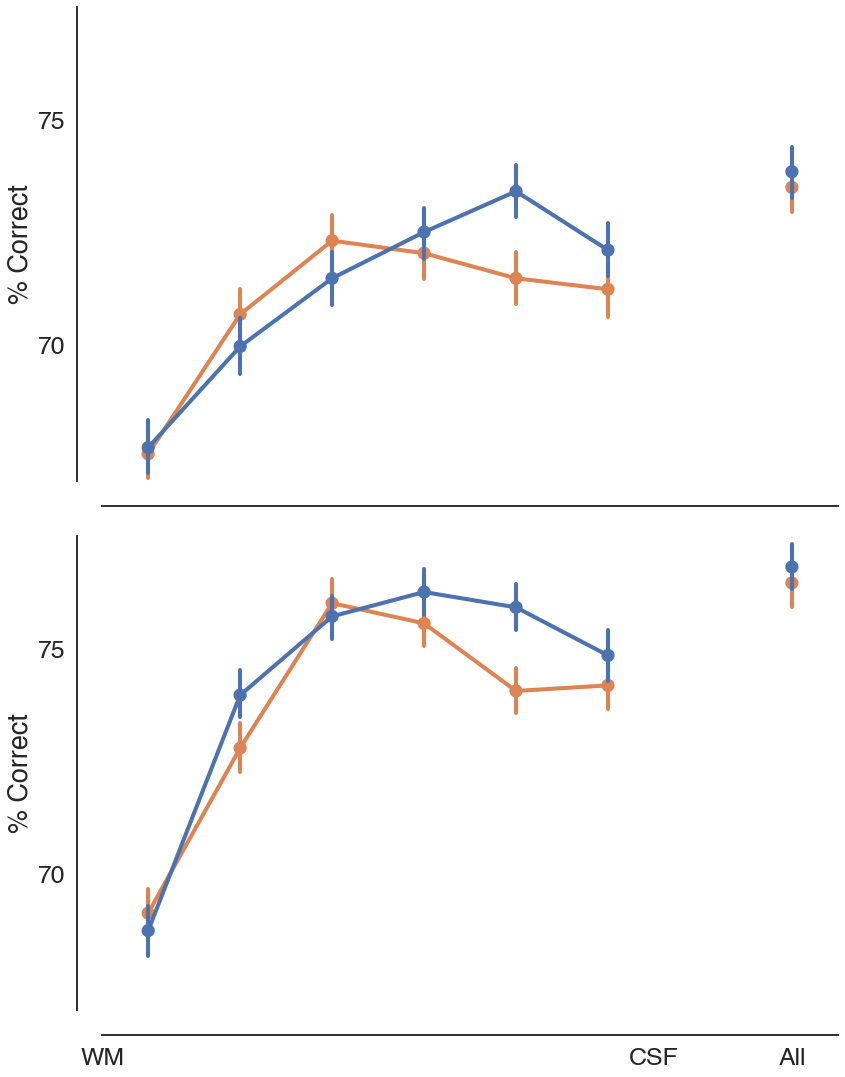

In [13]:
palette = sns.color_palette()
tmp['Mask'] = tmp['roi'].map({'V1l':'Left V1', 'V1r':'Right V1'})
tmp['Task'] = tmp['task'].apply(lambda x: x.capitalize())


fac = sns.catplot('Layer', 'Correct', 'Task', data=tmp, kind='point',
                  aspect=1.5,
                  row='Mask',
                  row_order=['Left V1', 'Right V1'],
                  legend=False,
                  hue_order=['Checkerboard', 'Fixation'],
                  height=8.,
                  unit='subject',
                  ci=67,
                  palette=palette[:2][::-1],
                  linewidth=5.,
                 order=[1, 2, 3, 4, 5, 6, '', 'all'])

# plt.xticks(list(range(6)) + [7], list(range(1, 7)) + ['all'])
x_, _ = plt.xticks()
plt.xticks([x_[0] - .5, x_[-3] + .5, x_[-1]], ['WM', 'CSF', 'All'])
plt.yticks(np.arange(70, 80+1e-3, 5., ))
fac.set(ylim=(67, 77.5))

fac.set_titles('')
fac.set_ylabels('% Correct')
fac.set_xlabels('')


sns.despine(offset=25.)
fac.savefig('/Users/gdehol/Dropbox/Science/7t_binocular/paper/figures/decoding/correct.svg', transparent=True)

In [15]:
import scipy.stats as ss

In [16]:
tmp_ = tmp.pivot_table(index=['subject', 'session'], columns=['task', 'Layer'], values='Correct')

t, p = ss.ttest_rel(tmp_['checkerboard'], tmp_['fixation'])
pd.DataFrame({'t':t, 'p': p})

,t,p
0,0.001708,0.998692
1,-0.328962,0.753363
2,0.380908,0.716394
3,-0.627858,0.553227
4,-2.105895,0.079825
5,-0.948730,0.379388
6,-0.431367,0.681270


In [17]:
from IPython.display import display

In [18]:
tmp_

task            checkerboard                                              \
Layer                      1          2          3          4          5   
subject session                                                            
bm      odc        90.000000  91.805556  91.388889  91.527778  89.722222   
de      odc1       66.666667  69.305556  72.291667  71.805556  73.263889   
eo      odc        66.041667  67.541667  69.625000  69.916667  69.250000   
ms      odc2       74.097222  78.888889  80.694444  80.000000  75.763889   
tk      odc2       55.916667  56.958333  59.166667  57.291667  56.375000   
        odc3       67.375000  75.333333  79.833333  81.541667  81.000000   
tr      odc        80.277778  83.263889  85.000000  82.777778  81.041667   

task                                    fixation                        \
Layer                    6        all          1          2          3   
subject session                                                          
bm      odc      88.750000  89.861111  91.388889  92.638889  92.500000   
de      odc1     74.375000  74.027778  62.569444  70.763889  72.013889   
eo      odc      71.125000  69.833333  64.500000  68.333333  70.791667   
ms      odc2     74.097222  81.597222  72.500000  74.097222  74.791667   
tk      odc2     55.958333  59.083333  58.291667  58.250000  57.750000   
        odc3     80.333333  83.083333  65.833333  73.750000  78.458333   
tr      odc      80.347222  84.236111  85.277778  87.777778  88.680556   

task                                                         
Layer                    4          5          6        all  
subject session                                              
bm      odc      93.611111  92.361111  88.472222  93.472222  
de      odc1     73.125000  72.291667  72.500000  72.847222  
eo      odc      70.916667  72.208333  71.791667  71.958333  
ms      odc2     75.138889  78.333333  74.861111  76.666667  
tk      odc2     58.291667  57.291667  57.833333  59.791667  
        odc3     80.500000  80.708333  79.833333  81.708333  
tr      odc      88.680556  88.194444  84.652778  89.097222

In [19]:
tmp_ = tmp.pivot_table(index=['Mask', 'subject', 'session'], columns=['task', 'Layer'], values='Correct')

t, p = ss.ttest_rel(tmp_.loc['Right V1', 'checkerboard'], tmp_.loc['Right V1', 'fixation'])
display(pd.DataFrame({'t':t, 'p': p}, index=tmp_['checkerboard'].columns))


t, p = ss.ttest_rel(tmp_.loc['Left V1', 'checkerboard'], tmp_.loc['Left V1', 'fixation'])
display(pd.DataFrame({'t':t, 'p': p}, index=tmp_['checkerboard'].columns))

,t,p
Layer,,
1,0.249357,0.811402
2,-1.168623,0.286881
3,0.366769,0.726378
4,-0.668652,0.528589
5,-2.320252,0.059428
6,-0.982216,0.363925
all,-0.350335,0.738058


,t,p
Layer,,
1,-0.049530,0.962415
2,0.427028,0.687123
3,0.436987,0.680349
4,-0.251217,0.811644
5,-1.488069,0.196897
6,-0.891632,0.413436
all,-0.082685,0.937310


In [20]:
palette = sns.color_palette()

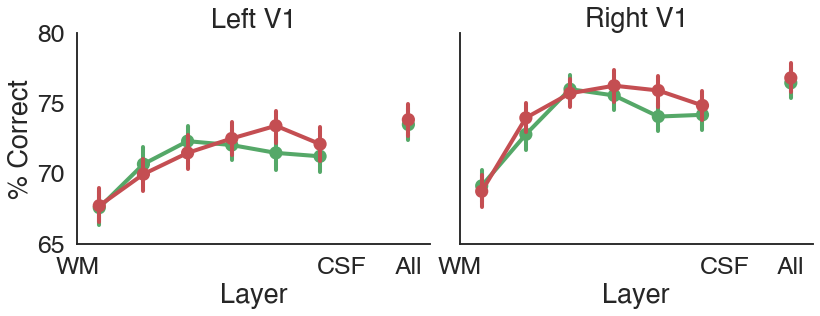

In [21]:
tmp['Mask'] = tmp['roi'].map({'V1l':'Left V1', 'V1r':'Right V1'})
tmp['Task'] = tmp['task'].apply(lambda x: x.capitalize())
fac = sns.catplot('Layer', 'Correct', 'Task', data=tmp, kind='point', col='Mask',
                  aspect=1.2,
                  col_order=['Left V1', 'Right V1'],
                  legend=False,
                  hue_order=['Checkerboard', 'Fixation'],
                  height=5.,
                  palette=palette[2:],
                 order=[1, 2, 3, 4, 5, 6, '', 'all'])

fac.set(ylim=(65, 80))
# plt.xticks(list(range(6)) + [7], list(range(1, 7)) + ['all'])
x_, _ = plt.xticks()
plt.xticks([x_[0] - .5, x_[-3] + .5, x_[-1]], ['WM', 'CSF', 'All'])
plt.yticks(np.arange(65, 80+1e-3, 5., ))

fac.set_titles('{col_name}')
fac.set_ylabels('% Correct')

# fac.savefig('/Users/gdehol/Dropbox/Science/7t_binocular/paper/figures/figure7/layer_decoding.pdf')

In [23]:
from IPython.display import display
from statsmodels.stats.anova import AnovaRM

tmp = df[np.in1d(df['roi'], ['V1l', 'V1r']) & (df.n_vertices == 400) & (df['lambda'] == 0.9)]
tmp = tmp[~(tmp.subject == 'ns') & ~((tmp.subject == 'bm') & (tmp.roi == 'V1l'))]
tmp = tmp[tmp.depth != 'all']
tmp = tmp.reset_index().groupby(['subject', 'session', 'roi', 'depth', 'task'], as_index=False).mean()
tmp['subject_'] = tmp.apply(lambda row: '{subject}.{session}'.format(**row.to_dict()), axis=1)

In [25]:
from IPython.display import display
from statsmodels.stats.anova import AnovaRM

tmp = df[np.in1d(df['roi'], ['V1l', 'V1r']) & (df.n_vertices == 400) & (df['lambda'] == 0.9)]
tmp = tmp[~(tmp.subject == 'ns') & ~((tmp.subject == 'bm') & (tmp.roi == 'V1l'))]
tmp = tmp[tmp.depth != 'all']
tmp = tmp.reset_index().groupby(['subject', 'session', 'roi', 'depth', 'task'], as_index=False).mean()
tmp['subject_'] = tmp.apply(lambda row: '{subject}.{session}'.format(**row.to_dict()), axis=1)
r = AnovaRM(tmp[tmp['roi'] == 'V1l'], 'correct', 'subject_', ['depth', 'task']).fit()

display(r.summary())

r = AnovaRM(tmp[tmp['roi'] == 'V1r'], 'correct', 'subject_', ['depth', 'task']).fit()
display(r.summary())

# tmp = df[np.in1d(df['roi'], ['V1l', 'V1r']) & (df.n_vertices == 400) & (df['lambda'] == 0.9)]
# tmp = tmp[~(tmp.subject == 'ns') & ~((tmp.subject == 'bm') & (tmp.roi == 'V1l'))]
# tmp = tmp[tmp.depth != 'all']
# tmp = tmp.reset_index().groupby(['subject', 'session', 'roi', 'depth'], as_index=False).mean()
# tmp['subject_'] = tmp.apply(lambda row: '{subject}.{session}'.format(**row.to_dict()), axis=1)

# r = AnovaRM(tmp[tmp['roi'] == 'V1l'], 'correct', 'subject_', ['depth']).fit()
# display(r.summary())

# r = AnovaRM(tmp[tmp['roi'] == 'V1r'], 'correct', 'subject_', ['depth']).fit()
# display(r.summary())

# # tmp = psc_mean.reset_index()
# # tmp['subject_'] = tmp.apply(lambda row: '{subject}.{session}'.format(**row.to_dict()), axis=1)
# # r = AnovaRM(tmp[tmp['mask'] == 'V1r'], 'psc', 'subject_', ['layer', 'task']).fit()

# # display(r.summary())

,F Value,Num DF,Den DF,Pr > F
depth,0.8129,5.0000,25.0000,0.5517
task,0.0633,1.0000,5.0000,0.8114
depth:task,1.9690,5.0000,25.0000,0.1184


,F Value,Num DF,Den DF,Pr > F
depth,14.0902,5.0000,30.0000,0.0000
task,0.8627,1.0000,6.0000,0.3888
depth:task,1.3289,5.0000,30.0000,0.2789


/Users/gdehol/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: 
The current behaviour of 'Series.argmax' is deprecated, use 'idxmax'
instead.
The behavior of 'argmax' will be corrected to return the positional
maximum in the future. For now, use 'series.values.argmax' or
'np.argmax(np.array(values))' to get the position of the maximum
row.
  """Entry point for launching an IPython kernel.


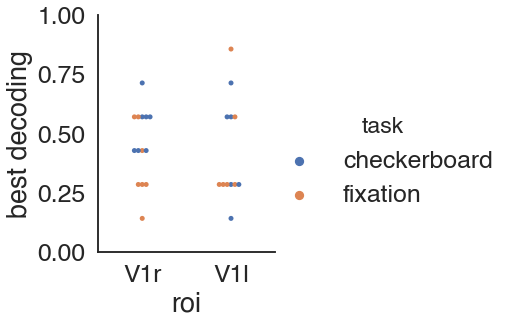

In [221]:
tmp2 = tmp.groupby(['subject', 'session', 'roi', 'task']).apply(lambda d: d.set_index('depth').correct.argmax()).to_frame('best decoding')
tmp2['best decoding'] = tmp2['best decoding'].astype(float)

fac = sns.catplot('roi', 'best decoding', 'task', data=tmp2.reset_index(), kind='swarm')
fac.set(ylim=(0, 1.))

In [222]:
events = pd.read_table('/data/odc/sourcedata/sub-tr/ses-odc/func/sub-tr_ses-odc_task-checkerboard_acq-07_run-02_events.tsv')

/Users/gdehol/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: read_table is deprecated, use read_csv instead, passing sep='\t'.
  """Entry point for launching an IPython kernel.


In [223]:
events['vol_duration'] = (events['duration'] / 4.).astype(int)
events['vol_onset'] = (events['onset'] / 4).astype(int) + 1
events['sign'] = events.trial_type.map({'eye_L': 1, 'eye_R':-1})

X = np.zeros((1, 65))

for ix, row in events.iterrows():
    X[:, row.vol_onset:row.vol_onset+row.vol_duration] = row['sign']
    
# X[:, -1] = 1

In [224]:
sns.set(font='helvetica', font_scale=1.5, style='white', context='talk')

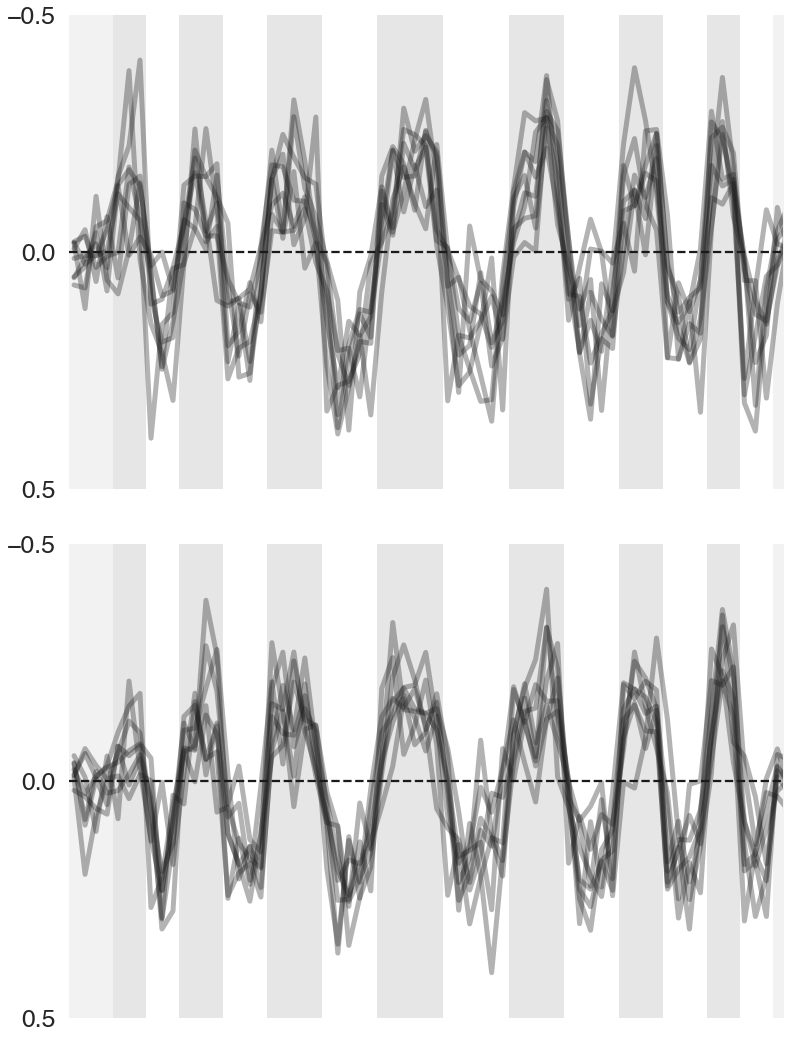

In [265]:
tmp = df[(df.n_vertices == 400) & (df.depth == 'all') & (df['subject'] == 'tr')].groupby(['subject','session',  'run', 'frame', 'task', 'roi']).mean()
tmp['log(Bayes Factor)'] = tmp['log(bayes factor)']
tmp['Volume'] = tmp.index.get_level_values('frame')
tmp = tmp.reset_index()
tmp['Mask'] = tmp['roi'].map({'V1l':'Left V1', 'V1r':'Right V1'})

tmp = tmp[np.in1d(tmp.roi, ['V1l', 'V1r'])]

fac = sns.FacetGrid(tmp.reset_index(), row='Mask', hue='run', aspect=1.5, palette=['k'],
#                     col_wrap=3.,
                   height=8.)
fac.map(sns.lineplot, 'Volume', 'log(Bayes Factor)', alpha=0.33, lw=5.)
fac.set_titles("")
fac.set_ylabels('')

fac.set_xlabels('')
fac.set(xticks=[])

for ax in fac.axes.ravel():
    ax.axhline(0, c='k', ls='--')
    ax.imshow(X, aspect='auto', alpha=.1, cmap='gray')
    
# fac.set(ylim=(-.5, .5))
plt.yticks([-.5, 0, .5])

sns.despine(trim=-1., bottom=True, left=True)
    
plt.savefig('/Users/gdehol/Dropbox/Science/7t_binocular/paper/figures/decoding/single_subject.svg', transparent=True)  


([<matplotlib.axis.YTick at 0x16386d208>,
 <a list of 3 Text yticklabel objects>)

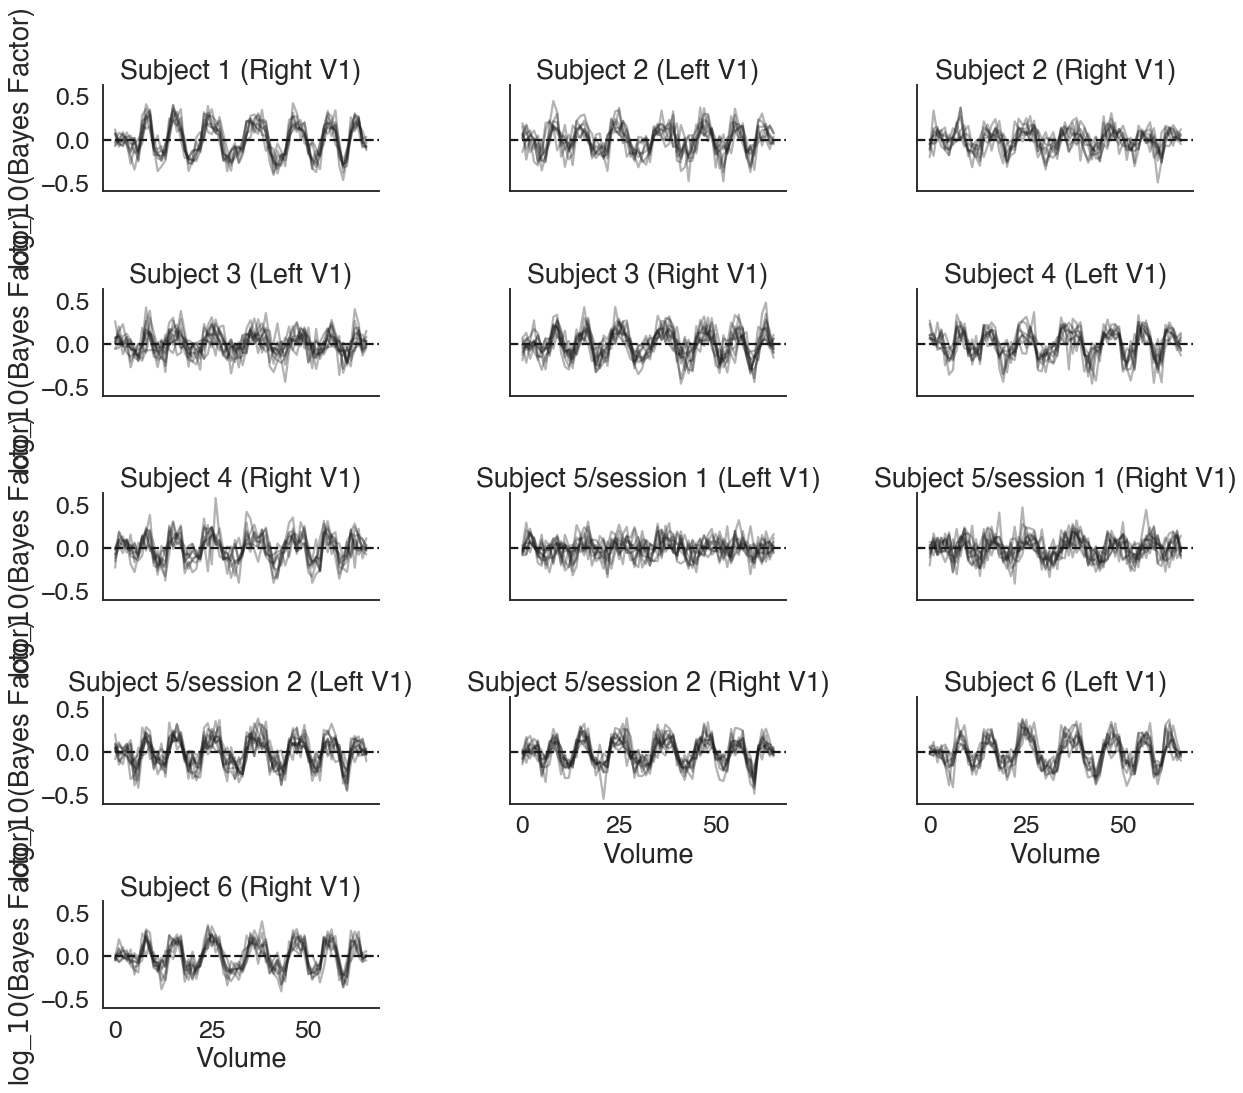

In [243]:
tmp = df[(df.n_vertices == 400) & (df.depth == 'all') & (df['subject'] != 'ns') & ~((df['subject'] == 'bm') & (df['roi'] == 'V1l'))].groupby(['subject','session',  'run', 'frame', 'task', 'roi']).mean()
tmp['log(Bayes Factor)'] = tmp['log(bayes factor)']
tmp['Volume'] = tmp.index.get_level_values('frame')
tmp = tmp.reset_index()


tmp['Subject'] = tmp['subject'].map({'bm':1, 'de':2, 'eo':3, 'ms':4, 'tk':5, 'tr':6})

tmp.loc[(tmp.subject == 'tk') & (tmp.session == 'odc2'), 'Subject'] = '5/session 1'
tmp.loc[(tmp.subject == 'tk') & (tmp.session == 'odc3'), 'Subject'] = '5/session 2'

tmp['Mask'] = tmp['roi'].map({'V1l':'Left V1', 'V1r':'Right V1'})

tmp['Label'] = tmp.apply(lambda row: 'Subject {Subject} ({Mask})'.format(**row.to_dict()), 1)

tmp = tmp[np.in1d(tmp.roi, ['V1l', 'V1r'])]

fac = sns.FacetGrid(tmp.reset_index(), col='Label', hue='run', aspect=2., palette=['k'],
                    col_wrap=3.,
                   height=3.)
fac.map(sns.lineplot, 'Volume', 'log(Bayes Factor)', alpha=0.33)
fac.set_titles("{col_name}")
fac.set_ylabels('log_${10}$(Bayes Factor)')

for ax in fac.axes.ravel():
    ax.axhline(0, c='k', ls='--')
    
# fac.set(ylim=(-.5, .5))
plt.yticks([-.5, 0, .5])
    
# plt.savefig('/Users/gdehol/Dropbox/Science/7t_binocular/paper/figures/figure7/time_bf.pdf', transparent=True)  

In [244]:
tmp = df[(df.n_vertices == 400) & (df['subject'] != 'ns') & ~((df['subject'] == 'bm') & (df['roi'] == 'V1l')) &
         np.in1d(df['roi'], ['V1']) & (df['lambda'] == 0.9)].groupby(['subject','session',  'run', 'frame', 'task', 'roi', 'depth']).mean()

tmp = tmp.drop('all', level='depth')

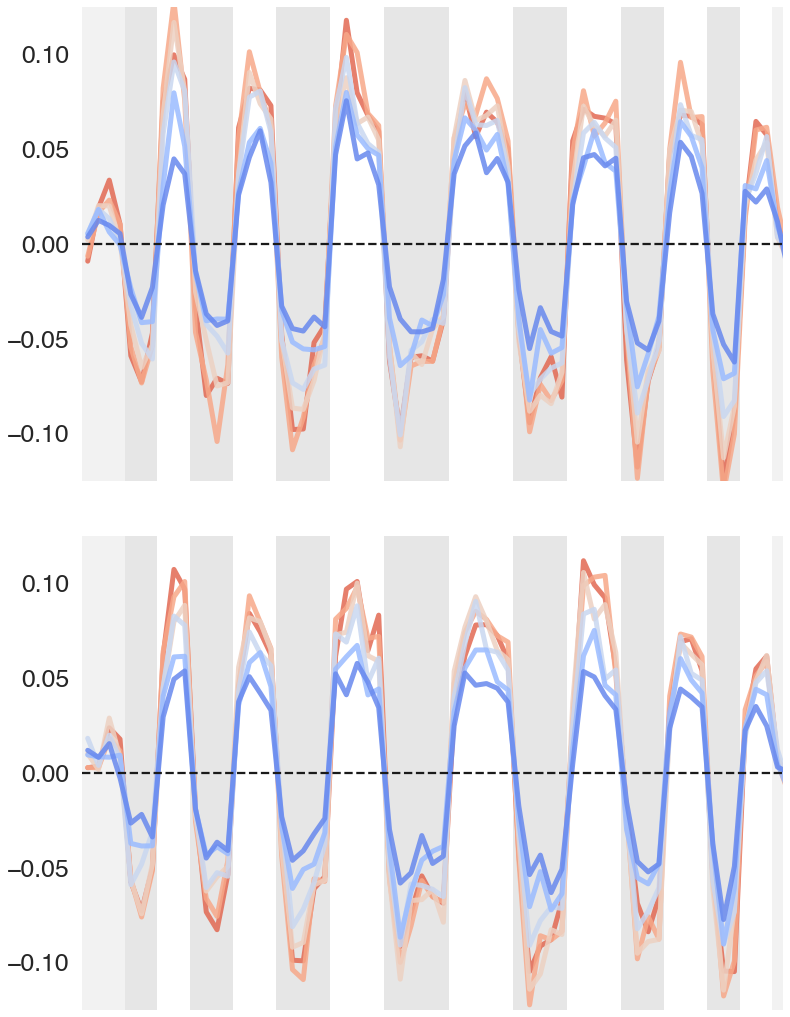

In [245]:
sns.set(font='helvetica', font_scale=1.5, style='white', context='talk')
fac = sns.FacetGrid(tmp.reset_index(), row='task', hue='depth', height=8., aspect=1.5, palette='coolwarm_r')
fac.map(sns.lineplot, 'frame', 'log(bayes factor)', ci=None, lw=5., alpha=.85)

# fac.add_legend()
# fac.set(ylim=(-.15, .15))

fac.set_xlabels('')
fac.set(xticks=[], ylim=(-.125, .125))
fac.set_ylabels('')

sns.despine(trim=-1., bottom=True, left=True)

for ax in fac.axes.ravel():
    ax.axhline(0, c='k', ls='--')
    ax.imshow(X, aspect='auto', alpha=.1, cmap='gray')

fac.set_titles('')
plt.savefig('/Users/gdehol/Dropbox/Science/7t_binocular/paper/figures/decoding/all_subjects.svg', transparent=True)  

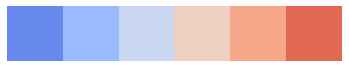

In [263]:
sns.palplot(sns.color_palette('coolwarm', n_colors=6, ))
plt.axis('off')

plt.savefig('/Users/gdehol/Dropbox/Science/7t_binocular/paper/figures/decoding/coolwarm.pdf', transparent=True)

## tmp.loc[tmp['left eye'] == 1., 'eye'] = 'left'
tmp.loc[tmp['right eye'] == 1., 'eye'] = 'right'

In [ ]:
conditions = tmp.reset_index().apply(lambda row: '{eye} ({task})'.format(**row.to_dict()), 1)
conditions.index = tmp.index
tmp['condition'] = conditions

In [ ]:
tmp = tmp[~tmp.eye.isnull()]

In [ ]:
sns.catplot('depth', 'log(bayes factor)', 'condition', tmp.reset_index(), kind='point')

In [ ]:
tmp = df[(df.n_vertices == 400) & (df.depth == 'all') & (df['subject'] != 'ns') & ~((df['subject'] == 'bm') & (df['roi'] == 'V1l'))].groupby(['subject','session',  'run', 'frame', 'task', 'roi']).mean()
tmp['log(Bayes Factor)'] = tmp['log(bayes factor)']
tmp['Volume'] = tmp.index.get_level_values('frame')
tmp = tmp.reset_index()


tmp['Subject'] = tmp['subject'].map({'bm':1, 'de':2, 'eo':3, 'ms':4, 'tk':5, 'tr':6})

tmp.loc[(tmp.subject == 'tk') & (tmp.session == 'odc2'), 'Subject'] = '5/session 1'
tmp.loc[(tmp.subject == 'tk') & (tmp.session == 'odc3'), 'Subject'] = '5/session 2'

tmp['Mask'] = tmp['roi'].map({'V1l':'Left V1', 'V1r':'Right V1'})

tmp = tmp[np.in1d(tmp.roi, ['V1l', 'V1r'])]

fac = sns.FacetGrid(tmp.reset_index(), col='Mask', hue='run', row='Subject', aspect=3., palette=['k'],
                   col_order=['Left V1', 'Right V1'], height=3.)
fac.map(sns.lineplot, 'Volume', 'log(Bayes Factor)', alpha=0.33)
fac.set_titles("Subject {row_name} ({col_name})")
fac.set_ylabels('log_${10}$(Bayes Factor)')

for ax in fac.axes.ravel():
    ax.axhline(0, c='k', ls='--')
    
# fac.set(ylim=(-.5, .5))
plt.yticks([-.5, 0, .5])
    
plt.savefig('/Users/gdehol/Dropbox/Science/7t_binocular/paper/figures/figure7/time_bf.pdf', transparent=True)  

In [ ]:
tmp = df[(df.n_vertices == 400)].reset_index().groupby(['subject', 'session', 'run', 'roi', 'depth', 'eye' ,'lambda'], as_index=False).mean()
tmp.loc[tmp['eye'] == 'left', 'log(bayes factor_correct)'] = tmp['log(bayes factor)']
tmp.loc[tmp['eye'] == 'right', 'log(bayes factor_correct)'] = -tmp['log(bayes factor)']


tmp['% correct'] = tmp['correct']
tmp['log(Bayes Factor)'] = tmp['log(bayes factor_correct)']

fac = sns.lmplot('log(Bayes Factor)', '% correct', col='roi', hue='lambda', 
           data=tmp[tmp.subject !='bm'].iloc[::5], legend=True, aspect=1., height=5., palette='Set3')

# plt.plot([0., 1], [.5, 1], c='k', ls='--')
fac.set_titles("{col_name}")


plt.ylim(.5, 1.)
plt.xlim(0., .4)

In [ ]:
tmp = df[np.in1d(df.roi, ['V1l', 'V1r']) & (df.depth == 'all')]
tmp = tmp[~(tmp.subject == 'ns') & ~((tmp.subject == 'bm') & ((tmp.roi == 'V1l'))) & (tmp.n_vertices == 200)]

tmp['q(log(bayes_factor))'] = tmp.groupby(['subject', 'session', 'lambda', 'roi'])['log(bayes factor)'].apply(lambda d: pd.qcut(d, 5, range(1, 6)))

In [ ]:
sns.catplot('q(log(bayes_factor))', 'correct', 'lambda', data=tmp, kind='point', aspect=2.5, row='roi')

In [501]:
from IPython.display import display 
from statsmodels.stats.anova import AnovaRM

tmp['q_log_bf'] = tmp['q(log(bayes_factor))']

r = AnovaRM(tmp[(tmp['roi'] == 'V1l') & (tmp['lambda'] == 0.1)], 'correct', 'subject', ['q_log_bf'], aggregate_func='mean').fit()

display(r.summary())

,Num DF,Den DF,F Value,Pr > F
q_log_bf,4.0000,16.0000,70.7509,0.0000


In [502]:
tmp.groupby(['roi', 'lambda']).apply(lambda d: AnovaRM(d, 'correct', 'subject', ['q_log_bf'], aggregate_func='mean' ).fit().anova_table)

Num DF  Den DF    F Value        Pr > F
roi lambda                                                  
V1l 0.1    q_log_bf     4.0    16.0  70.750882  5.762714e-10
    0.5    q_log_bf     4.0    16.0   4.697756  1.064649e-02
    0.9    q_log_bf     4.0    16.0  31.231937  2.233723e-07
    1.0    q_log_bf     4.0    16.0   8.820985  5.838423e-04
V1r 0.1    q_log_bf     4.0    20.0   3.834670  1.800433e-02
    0.5    q_log_bf     4.0    20.0  38.240694  4.206598e-09
    0.9    q_log_bf     4.0    20.0   5.440658  3.940807e-03
    1.0    q_log_bf     4.0    20.0  47.015369  6.761805e-10

In [491]:
r.anova_table.columns

Index(['Num DF', 'Den DF', 'F Value', 'Pr > F'], dtype='object')

In [ ]:
tmp.groupby()